In [1]:
import os
import sys
import math
import logging
from pathlib import Path

import numpy as np
import scipy as sp

%load_ext autoreload
%autoreload 2

import daft
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (12, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

In [2]:
# Matplotlib/LaTeX Vodoo
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family': 'serif',
          }
plt.rcParams.update(params) 

## Classical Latent Dirichlet Problem for Collatorative Filtering

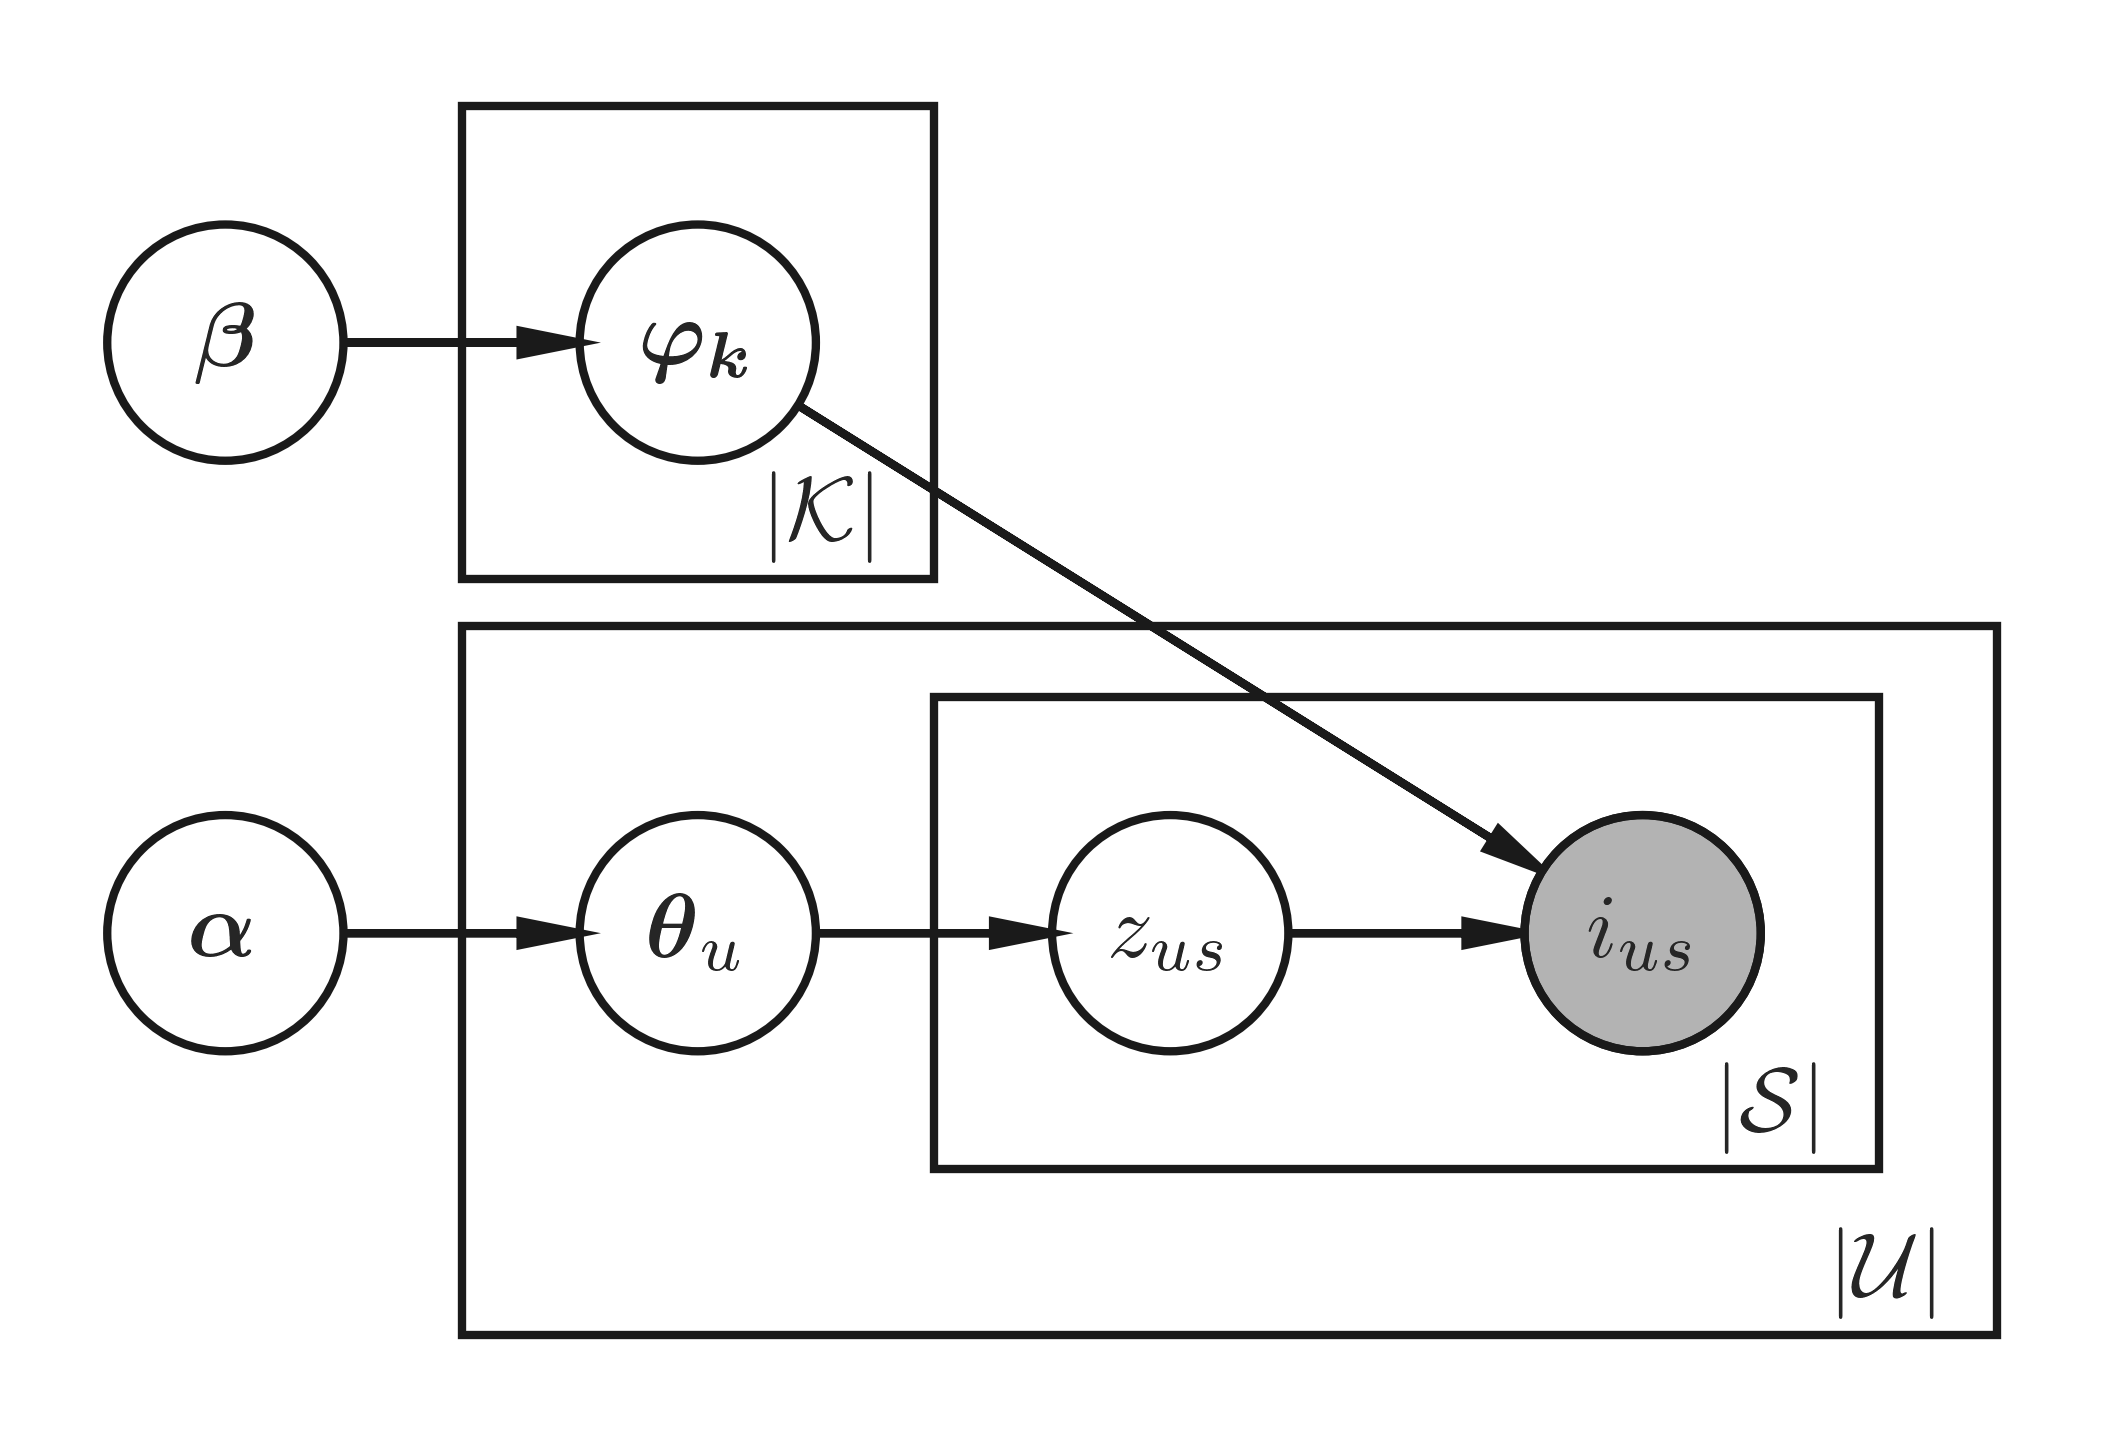

In [3]:
pgm = daft.PGM()
pgm.add_node("alpha", r"$\boldsymbol{\alpha}$", 0, 4)
pgm.add_node("theta", r"$\boldsymbol{\theta}_{u}$", 1, 4)
pgm.add_node("z", r"$z_{us}$", 2, 4)
pgm.add_node("i", r"$i_{us}$", 3, 4, observed=True)
pgm.add_edge("alpha", "theta")
pgm.add_edge("theta", "z")
pgm.add_edge("z", "i")
pgm.add_plate([1.5, 3.5, 2, 1], label=r"$\vert\mathcal{S}\vert$", position='bottom right', label_offset=(5,2))
pgm.add_plate([0.5, 3.15, 3.25, 1.5], label=r"$\vert\mathcal{U}\vert$", position='bottom right', label_offset=(5,2))


pgm.add_node("beta", r"$\boldsymbol{\beta}$", 0, 5.25)
pgm.add_node("phi", r"$\boldsymbol{\varphi_{k}}$", 1, 5.25)
pgm.add_edge("beta", "phi")
pgm.add_edge("phi", "i")
pgm.add_plate([0.5, 4.75, 1, 1], label=r"$\vert\mathcal{K}\vert$", position='bottom right', label_offset=(5,2))
             

pgm.render(dpi=300)
pgm.savefig("classic_lda.pdf");

## Adjoint Latent Dirichlet Allocation for Collaborative Filtering

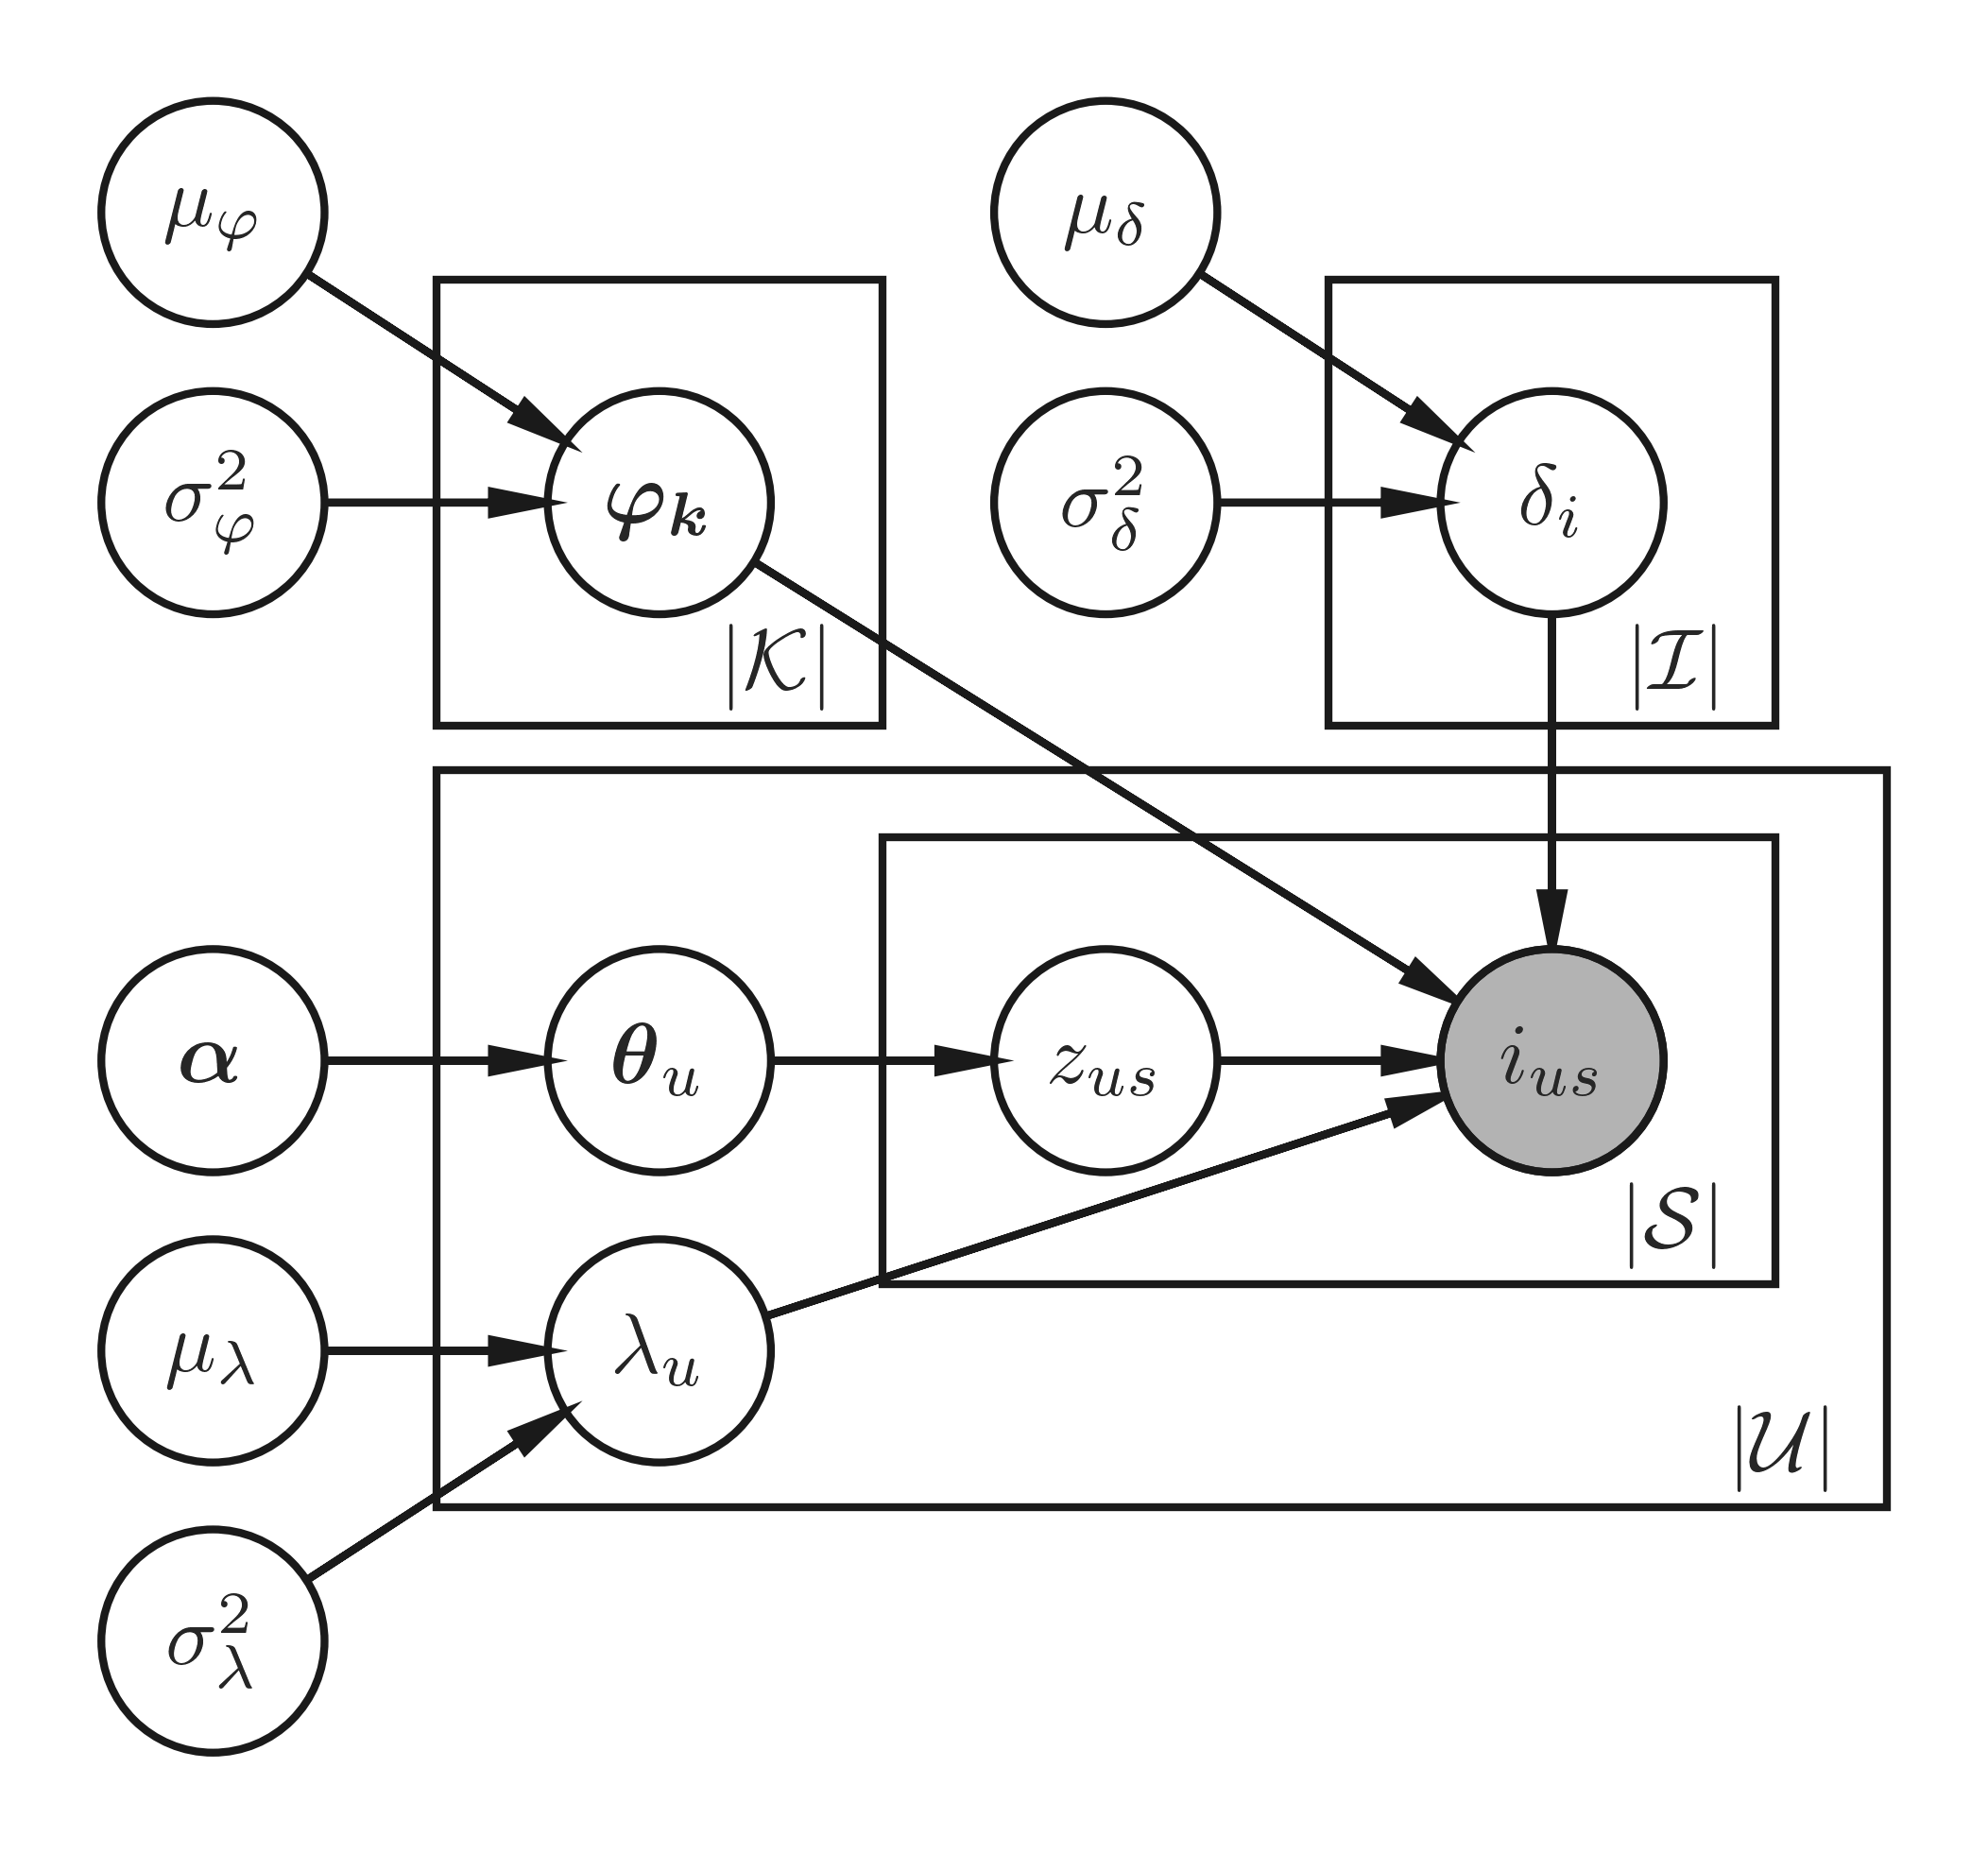

In [13]:
pgm = daft.PGM()
pgm.add_node("alpha", r"$\boldsymbol{\alpha}$", 0, 4)
pgm.add_node("theta", r"$\boldsymbol{\theta}_{u}$", 1, 4)
pgm.add_node("z", r"$z_{us}$", 2, 4)

pgm.add_node("mu_lambda", r"$\mu_\lambda$", 0, 3.35)
pgm.add_node("sig_lambda", r"$\sigma^2_\lambda$", 0, 2.7)
pgm.add_node("lambda", r"$\lambda_{u}$", 1, 3.35)
pgm.add_node("i", r"$i_{us}$", 3, 4, observed=True)
pgm.add_edge("alpha", "theta")
pgm.add_edge("theta", "z")
pgm.add_edge("z", "i")
pgm.add_edge("lambda", "i")
pgm.add_edge("mu_lambda", "lambda")
pgm.add_edge("sig_lambda", "lambda")
pgm.add_plate([1.5, 3.5, 2, 1], label=r"$\vert\mathcal{S}\vert$", position='bottom right', label_offset=(5,2))
pgm.add_plate([0.5, 3, 3.25, 1.65], label=r"$\vert\mathcal{U}\vert$", position='bottom right', label_offset=(5,2))

pgm.add_node("mu_phi", r"$\mu_\varphi$", 0, 5.9)
pgm.add_node("sig_phi", r"$\sigma^2_\varphi$", 0, 5.25)
pgm.add_node("phi", r"$\boldsymbol{\varphi_{k}}$", 1, 5.25)
pgm.add_edge("mu_phi", "phi")
pgm.add_edge("sig_phi", "phi")
pgm.add_edge("phi", "i")
pgm.add_plate([0.5, 4.75, 1, 1], label=r"$\vert\mathcal{K}\vert$", position='bottom right', label_offset=(5,2))


pgm.add_node("mu_delta", r"$\mu_\delta$", 2, 5.9)
pgm.add_node("sig_delta", r"$\sigma^2_\delta$", 2, 5.25)
pgm.add_node("delta", r"$\delta_{i}$", 3, 5.25)
pgm.add_edge("delta", "i")
pgm.add_edge("mu_delta", "delta")
pgm.add_edge("sig_delta", "delta")
pgm.add_plate([2.5, 4.75, 1, 1], label=r"$\vert\mathcal{I}\vert$", position='bottom right', label_offset=(5,2))


pgm.render(dpi=300)
pgm.savefig("recsys_lda.pdf");